# Семинар 3. Операции над массивами NumPy

На прошлом занятии мы с вами начали знакомство с библиотекой NumPy и рассмотрели возможные способы создания массивов NumPy. Однако, очевидно, что работа с данными не ограничивается исключительно созданием массивов. На этом семинаре мы рассмотрим возможные формы взаимодействия с массивами NumPy и разберемся, как взаимодействовать с ними эффективно.

**Импорт библиотек:**

In [1]:
import numpy as np

## Векторизованные операции

На прошлом семинаре мы рассмотрели производительность Python при работе с массивами данных, и пришли к выводу о его медлительности, связанной с подходом к хранению данных. На самом деле проблема кроется не только в подходе к хранению данных, но и в издержках динамической типизации. Т.е. если мы просто изменим подход к хранению данных без изменения подхода к работе с ними, мы не увидим никакого качественного прироста в быстродействии программы. Мы можем переходить на NumPy, CuPy, PyTorch, на что угодно, но без изменения способа работы с данными, выигрыша в производительности мы не увидим.

Чтобы понять это, давайте рассмотрим простой пример: реализуем функцию, которая для значения каждого элемент входного массива вычисляет обратное ему значение и возвращает новый массив вычисленных значений.

**Необходимые импорты:**

In [5]:
from typing import Sequence
from numbers import Real

**Функция:**

In [6]:
def invert_array(array: Sequence[Real]) -> list[Real]:
    inverted = [
        1. / value if value != 0 else value
        for value in array
    ]

    return inverted

**Тесты:**

In [7]:
array_size = int(1e7)

array_numpy = np.random.uniform(-10, 10, size=array_size)
array_python = array_numpy.tolist()

In [8]:
%timeit invert_array(array_python)
%timeit invert_array(array_numpy)

716 ms ± 28.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.22 s ± 9.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
del array_numpy
del array_python

Как мы видим, использование NumPy не просто не решило проблему, а даже замедлило скорость вычислений. Но почему? Как уже было сказано выше, все дело в динамической типизации и, в частности, в том, как интерпретатор ее реализует. Дело в том, что при использовании нативных конструкций языка, мы не можем никаким образом предкомпилировать исходный код, и как следствие оптимизировать написанное. В итоге, сам интерпретатор в процессе выполнения помимо непосредственно описанных вычислений занимается проверкой типов аргументов, на что уходит значительное количество времени.

Когда мы используем NumPy, у нас появляется возможность предкомпилировать наш код, поскольку массивы NumPy строго типизированы, а значит у нас появляется возможность оптимизации кода по быстродействию. Но чтобы этого добиться мы должны еще и предкомпилировать оперции, выполняемые над массивами. Средствами Python это сделать нельзя. Поэтому важно использовать предкомпилированные средства NumPy для выполнения операций над массивами, чтобы в полный мере ощутить приемущества этой библиотеки над средствами "чистого" Python. Специальные операции NumPy, которые позволяют увеличить эффективность при работе с массивами данных, и называются `векторизованными операциями`.

### Арифметические операции

Все арифметические операции, с которыми вы работали в "чистом" Python, имеют место и в NumPy, и смысл их остается тем же, что и в обычной алгебре.

In [10]:
numbers = np.arange(5)

print(
    f"{numbers = }",
    f"numbers + 2 = {numbers + 2};",
    f"numbers - 2 = {numbers - 2};",
    f"numbers * 2 = {numbers * 2};",
    f"numbers / 2 = {numbers / 2};",
    f"numbers % 2 = {numbers % 2};",
    f"numbers // 2 = {numbers // 2};",
    f"numbers ** 2 = {numbers ** 2};",
    sep="\n",
)

numbers = array([0, 1, 2, 3, 4])
numbers + 2 = [2 3 4 5 6];
numbers - 2 = [-2 -1  0  1  2];
numbers * 2 = [0 2 4 6 8];
numbers / 2 = [0.  0.5 1.  1.5 2. ];
numbers % 2 = [0 1 0 1 0];
numbers // 2 = [0 0 1 1 2];
numbers ** 2 = [ 0  1  4  9 16];


In [15]:
numbers = np.arange(1, 10)

print(
    f"array:\n{numbers}",
    f"array-number operation:\n{numbers * 8}",
    f"array-array operation:\n{numbers - numbers[::-1]}",
    f"2D-array operation:\n{numbers.reshape(3, 3) ** 2}",
    sep="\n\n",
)

array:
[1 2 3 4 5 6 7 8 9]

array-number operation:
[ 8 16 24 32 40 48 56 64 72]

array-array operation:
[-8 -6 -4 -2  0  2  4  6  8]

2D-array operation:
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


Как вы видите, применение векторизованной операции к массиву NumPy аналогично поэлементному применению той же операции в цикле. Только в сравнении с векторизованными операциями, циклы будут работать гораздо меделнее. Чтобы в этом убедиться, сравним результаты времени работы нашей функции `invert_array` с аналогичной векторизованной операцией.

In [16]:
array = np.arange(1, 1 + int(1e6))

In [17]:
%timeit invert_array(array)
%timeit (1. / array)

858 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.57 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
del array

Как можно видеть, разница в быстродействии измеряется несколькими порядками. И чем больше будет размер массива, ты больше будет разница в затрачиваемом на его обработку времени со стороны Python и со стороны NumPy.

Стоит отметить, что все операторные формы векторизованных операций представляют собой адаптеры векторизованных операций в функциональном виде. Приведем ниже таблицу соответствий:

| Операторная форма | Функциональная форма | Описание |
|--|--|--|
| + | np.add | Сложение |
| - | np.substract | Бинарный минус - описание |
| - | np.negative | Унарные минус (эквивалент * (-1)) |
| * | np.multiply | Умножение |
| / | np.divide | "Честное" деление |
| % | np.mod | Вычисление остатка при делении |
| // | np.floor_divide | Вычисление целой части при делении |
| ** | np.power | Возведение в степень |

На первый взгляд наличие векторизованных арифметический функций в функциональном виде кажется избыточным. Однако, не стоит спешить с выводами. Функциональная форма предоставляет вам ряд дополнительных возможностей, к число которых относится оптимизация вычислений по используемой памяти, а также превращение простой векторизованной операции в векторизованное агрегирование. Рассмотрим примеры.

In [19]:
array1 = np.arange(5)
array2 = np.random.randint(-10, 10, size=array1.shape)

print(
    f"{array1 = }", f"{array2 = }", sep="\n", end="\n\n"
)

np.add(array1, array2, out=array2)

print(
    f"{array1 = }", f"{array2 = }", sep="\n",
)

array1 = array([0, 1, 2, 3, 4])
array2 = array([ 1,  6,  4, -7,  5])

array1 = array([0, 1, 2, 3, 4])
array2 = array([ 1,  7,  6, -4,  9])


Итак, в примере выше с помощью специального аргумента `out`, которым обладают все перечисленные в таблице выше функции, мы явно указали область памяти, в которую будут осуществлена запись результата операции. Это позволяет сэкономить память компьютера, особенно если вы намереваетесь обрабатывать действительно большие массивы данных. Экономия памяти происходит за счет того, что компьютер больше не выделяет дополнительную память для хранения промежуточных вычислений, а сразу записывает результат в указанный буфер. Ведь если бы пример выше был бы реализован более привычным образом:

```python
array2 = array1 + array2
```

То интерпретатор действовал бы следующим образом:
1. Выделил бы область памяти, соответствующую размеру результирующего массива;
2. Вычислил бы правую часть и записал бы результат в буффер;
3. Перекопировал вычисленные значения из буффера в array2;

При использовании `out` мы пропускаем шаги с созданием буффера и копированием, вместо этого запись результата происходит сразу в указанную область памяти.

Помимо этого, функциональные версии векторизованных бинарных арифметических операций имеют возможность редучирования данных. Например: 

In [20]:
numbers = 2 ** (-np.arange(10, dtype=np.float32))
print(numbers, end="\n\n")

print(
    f"sum reduce: {np.add.reduce(numbers)}",
    f"sub reduce: {np.subtract.reduce(numbers)}",
    f"multiply reduce: {np.multiply.reduce(numbers)}",
    f"divide reduce: {np.divide.reduce(numbers)}",
    sep="\n",
)

[1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]

sum reduce: 1.998046875
sub reduce: 0.001953125
multiply reduce: 2.842170943040401e-14
divide reduce: 35184372088832.0


В этом случае мы просто применяем указанную операцию к элементам массива до тех пор, пока в массиве не останется одного элемента. Также вы можете вычислять операции над элементами массива кумулятивно - каждый элемент результирующего массива - результат применения операции ко всем предшествующим ему элементам, а также к нему включительно. 

In [21]:
print(
    f"sum accumulate:\n{np.add.accumulate(numbers)}",
    f"sub accumulate:\n{np.subtract.accumulate(numbers)}",
    f"multiply accumulate:\n{np.multiply.accumulate(numbers)}",
    f"divide accumulate:\n{np.divide.accumulate(numbers)}",
    sep="\n\n",
)

sum accumulate:
[1.        1.5       1.75      1.875     1.9375    1.96875   1.984375
 1.9921875 1.9960938 1.9980469]

sub accumulate:
[1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]

multiply accumulate:
[1.0000000e+00 5.0000000e-01 1.2500000e-01 1.5625000e-02 9.7656250e-04
 3.0517578e-05 4.7683716e-07 3.7252903e-09 1.4551915e-11 2.8421709e-14]

divide accumulate:
[1.0000000e+00 2.0000000e+00 8.0000000e+00 6.4000000e+01 1.0240000e+03
 3.2768000e+04 2.0971520e+06 2.6843546e+08 6.8719477e+10 3.5184372e+13]


Однако у комулятивных методов есть более удобные аналоги, которые мы рассмотрим позже.

### Логические операции и булевы маски

Вы также можете использовать логические операторы, в контексте массивов NumPy они будут иметь тот же смысл, что и в булевой алгебре. Результатом применения логической операции к массиву будет новый массив булевых значений, элементы которого - значения выполнения соответствующих операций.

In [4]:
numbers = np.random.uniform(-5, 5, size=5)

print(
    f"numbers: {numbers}",
    f"numbers < 0 = {numbers < 0}",
    f"numbers > 0 = {numbers > 0}",
    f"numbers == 0 = {numbers == 0}",
    f"numbers <= 0 = {numbers <= 0}",
    f"numbers >= 0 = {numbers >= 0}",
    sep="\n",
)

numbers: [-4.33983224  0.89697508  1.64129844 -3.69611927  4.07225957]
numbers < 0 = [ True False False  True False]
numbers > 0 = [False  True  True False  True]
numbers == 0 = [False False False False False]
numbers <= 0 = [ True False False  True False]
numbers >= 0 = [False  True  True False  True]


На первый взгляд может показаться, что это совершенно бесполезные операции, однако это не так. Давайте рассмотрим пару примеров использования булевых массивов.

Напомним, что булевый тип данных - это дочерний класс типа данных "целые числа", а соответственно мы можем работать с булевыми значениями, как с целыми числами. Соответственно, с помощью булевого массива мы можем, например, подсчитать количество элементов массива, которые удовлетворяют определенному условию:

In [5]:
print(
    f"negative values amount: {np.add.reduce(numbers < 0)}"
)

negative values amount: 2


Однако у булевых массивов есть и более важная функция. Из прошлого семинара мы помним, что массивы NumPy могут быть проиндексированы булевыми масивами. Соответственно, получаемые таким образом булевые массивы могут быть использованы в качестве так называемой булевой маски, чтобы отфильтровывать отпределенные элементы массива по заданному условию:

In [6]:
print(f"negative values: {numbers[numbers < 0]}")

negative values: [-4.33983224 -3.69611927]


Более того, мы можем использовать сложные условия, комбинируя булевы маски с помощью оператором побитового И и побитового ИЛИ:

In [8]:
mask = (0 <= numbers) & (numbers < 3)
print(f"condition values: {numbers[mask]}")

condition values: [0.89697508 1.64129844]


Обращаю отдельное внимание на то, что комбинирование булевых масок осуществляется с помощью побитовых операций `&` и `|`, а не с помощью логических операций `and` и `or`. Также не забывайте использовать скобки для группировки условий.

### Математические операции

Помимо арифметических и логических функций, NumPy имеет достаточно богатую библиотеку арифметических функций: тригонометрических, обратных тригонометрических, гиперболических, обратных гиперболических, экспоненциальных, логарифмических и т.д. Вызовы этих функций очень похожи между собой, поэтому следующая ячейка кода носит скорее демонстрационный характер. При необходимости использования конкретной функции, вы можете обратиться к документации:

In [9]:
abscissa = np.linspace(0, np.pi, 5)

print(
    f"{abscissa = }",
    f"triganometric:\n{np.sin(abscissa)}",
    f"inverse trigonometric:\n{np.arctan(abscissa)}",
    f"hyperbolic:\n{np.cosh(abscissa)}",
    f"inverse hyperbolic:\n{np.sinh(abscissa)}",
    f"exponential:\n{np.exp(abscissa)}",
    f"logarithmic:\n{np.log2(abscissa[abscissa > 0])}",
    sep="\n\n",
)

abscissa = array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

triganometric:
[0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]

inverse trigonometric:
[0.         0.66577375 1.00388482 1.16942282 1.26262726]

hyperbolic:
[ 1.          1.32460909  2.50917848  5.32275215 11.59195328]

inverse hyperbolic:
[ 0.          0.86867096  2.3012989   5.22797192 11.54873936]

exponential:
[ 1.          2.19328005  4.81047738 10.55072407 23.14069263]

logarithmic:
[-0.34850387  0.65149613  1.23645863  1.65149613]


В примерах выше описано использование арифметических функций с одномерными массивами, однако стоит понимать, что данные функции также могут быть использованы и с массивами произвольной размерности.

## Транслирование (Broadcasting)

В одном из примеров выше мы видели, что аргументами векторизованных арифметических операций могут выступать два массива NumPy одинаковой размерности. Однако одна изключевых особенностей NumPy заключается в том, что массивам не обязательно иметь одинаковые размеры. Проиллюстрируем это утверждение примером:

In [11]:
lhs = np.arange(9).reshape(3, 3)
rhs = np.arange(3)

print(
    f"lhs:\n{lhs}",
    f"rhs:\n{rhs}",
    f"sum:\n{lhs + rhs}",
    sep="\n\n",
)

lhs:
[[0 1 2]
 [3 4 5]
 [6 7 8]]

rhs:
[0 1 2]

sum:
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]


Первое, что появляется в голове у неподготовленного человека, увидевшего нечто подобное - это вопрос: почему так? Почему этот кусок кода не возбудил ошибку, по типу `Несовместимые размеры массивов`? На самом деле размеры операндов совместимы, просто NumPy трактует совместимость размеров несколько шире банального равенства значений атрибутов `shape`. Проведение операций над массивами разных, но совместимых размеров называется транслированием (broadcasting). Однако это не значит, что мы можем использовать в качестве операндов одной операции массивы абсолютно любых форм, потому что механизм транслирования имеет свои ограничения и подчиняется следующим правилам:

+ Если размерности (`ndim`) двух массивов отличаются, форма (`shape`) массива с меньшей размерностью дополняется единицей с левой стороны:
    ```concole
    1. lhs.ndim != rhs.ndim
    2. lhs.ndim > rhs.ndim
    3. rhs.shape == (3, ) -> rhs.shape == (1, 3)
       [0 1 2] -> [[0 1 2]]
    ```
+ Если форма двух массивов не совпадает в каком-то измерении, массив с формой, равной 1 в этом измерении, растягивается вплоть до соответствия форме второго массива:
    ```console
    4. lhs.shape[0] != rhs.shape[0]
    5. rhs.shape == (1, 3) -> rhs.shape == (3, 3)
       [[0 1 2]] -> [[0 1 2]
                     [0 1 2]
                     [0 1 2]]
    ```
+ Если в каком-то измерении размеры массивов различаются и ни один не равен 1, генерируется ошибка. В нашем примере этот случай не реализуется.

Нагладно суть транслирования можно понять с помощью следующей иллюстрации:

![broadcasting](./images/broadcasting.png)

## Задача 1. Полярные координаты

Вам необходимо реализовать функции перевода из прямоугольных декартовых координат в полярные и обратно. На вход подаются два массива числел -  координаты точек в исходной системе координат. На выходе также должно получаться два массива точек - координаты в новой системе координат.

**Совет**: вам может пригодиться функция [`np.arctan2()`](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html).

**ВАЖНО**: использовать циклы нельзя, все операции должны быть векторизованными.

**Функции:**

In [13]:
def convert_to_polar(
    abscissa: np.ndarray,
    ordinates: np.ndarray,
) -> tuple[np.ndarray, np.ndarray]:
    distances = (abscissa ** 2 + ordinates ** 2) ** 0.5
    angles = np.arctan2(ordinates, abscissa)

    return distances, angles

In [6]:
def convert_from_polar(
    distances: np.ndarray,
    angles: np.ndarray,
) -> tuple[np.ndarray, np.ndarray]:
    abscissa = distances * np.cos(angles)
    ordinates = distances * np.sin(angles)

    return abscissa, ordinates

**Тесты:**

In [14]:
distances = np.full(shape=1000, fill_value=5)
angles = np.linspace(-np.pi, np.pi, distances.shape[0])

abscissa, ordinates = convert_from_polar(distances, angles)
distances_converted, angles_converted = convert_to_polar(abscissa, ordinates)

assert np.all(np.isclose(distances, distances_converted))
assert np.all(np.isclose(angles, angles_converted))

## Задача 2. Круг

Напомним, что одноканальные (черно-белые) изображения представляются двумерным массивом чисел. Размеры массива соответствуют размеру исходного изображения в пикселях, а значения массива - яркости данного пикселя изображения. Чем больше значение элемента - тем ярче этот пиксель в исходной картинке. Черному цвету соответствует значение `0`.

Итак, вам необходимо реализовать функцию, которая бы принимала на вход двумерный массив `image`, соответствующий исходному изображению, и три целых числа: `row`, `column` и `radis`, соотвественно. Сама функция должна вырезать из картинки круговую область. Числа `row` и `column` задают координаты пикселя изображения, соотвутствующего центру круга, `radius` - радиус круга в пикселях. На выходе функции должно получится изображение, того же размера, что и исходное. Результирующее изображение должно содержать пиксели двух видов: пиксели, попавшие в круг, значения этих пикселей равны значениям соответствующих пикселей исходного изображения; пиксели, не попавшие в круг, их значения должны быть равны нулю.

**ВАЖНО**: Нельзя использовать циклы, реализация должна содержать только векторизованные операции.

![circles](./images/circles.png)

**Необходимые импорты:**

In [2]:
import os
import numpy as np

from utils import read_grayscale_image, visualize_image

**Функция:**

In [6]:
def crop_circle(
    image: np.ndarray,
    row: int,
    column: int,
    radius: int,
) -> np.ndarray:
    pixel_lds = np.arange(image.shape[0] * image.shape[1])
    pixel_columns = pixel_lds % image.shape[1]
    pixel_rows = pixel_lds // image.shape[0]
    mask = (pixel_columns - column) ** 2 + (pixel_rows - row) ** 2 < radius ** 2
    mask = mask.reshape(image.shape[0], image.shape[1])

    return image * mask

**Тесты:**

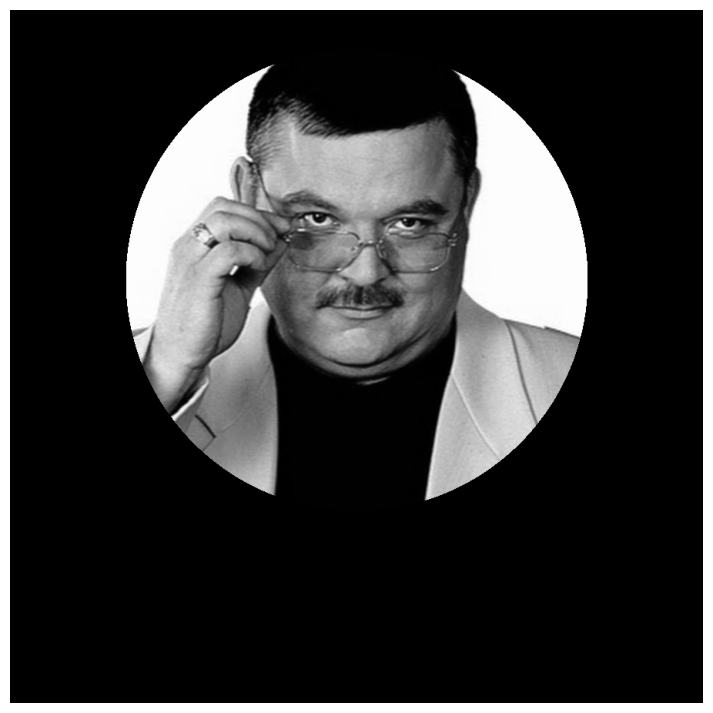

In [7]:
path_to_image = os.path.join("images", "circle.jpg")
assert os.path.exists(path_to_image)

image = read_grayscale_image(path_to_image)
image_cropped = crop_circle(
    image=image,
    row=350,
    column=450,
    radius=300,
)

visualize_image(image_cropped)

## Задача 3. Размытие

В этом задании перед нами стоит задача реализовать фильтр размытия, аналогичный данному фильру в различных редакторах фото. Но прежде чем переходить к реализации самого фильтра размытия, нам необходимо будет выполнить подготовительные шаги.

### Часть 1. Паддинг

Слово паддинг буквально можно перевести, как отступ. В контексте текущей задачи паддингом мы будем называть рамку вокруг изображения, шириной в заданное число пикселей, заполненную нулями. На картинке ниже приведен пример применения паддинга шириной в 1 пиксель к входному изображению.

![padding](./images/padding.jpg)

Ваша задача - реализовать функцию, реализующую паддинг. Входом функции является массив - черно-белое изображение, целое число - ширина паддинга, выходом - функции, изображение с рамкой заданной ширины.

**Функции**:

In [3]:
def pad_image(image: np.ndarray, pad_size: int) -> np.ndarray:
    zero = np.zeros(shape=[i + 2*pad_size for i in image.shape])
    zero[pad_size:zero.shape[0] - pad_size, pad_size:zero.shape[1] - pad_size] = image
    return zero

**Тесты:**

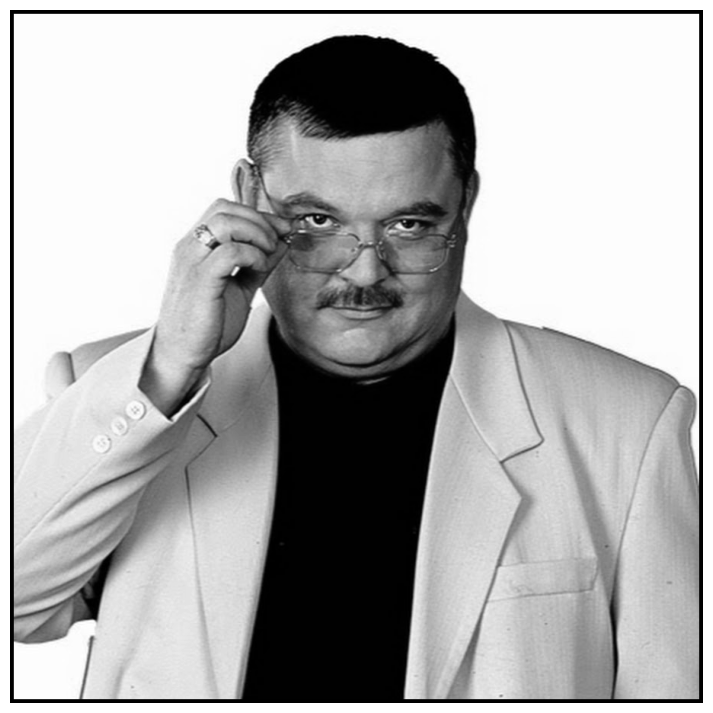

In [7]:
image_padded = pad_image(image, pad_size=5)
visualize_image(image_padded)

### Часть 2. Размытие

Теперь мы готовы реализовывать фильтр "размытие". Размытие изображения работает достаточно просто:

- Сначала задается размер окна размытия - $l_w$, которое можно интерпретировать, как степень размытия. Чем больше окно размытия, тем сильнее результирующая картинка будет размыта. Обычно в качестве размеров окна размытия используются нечетные целые числа.
- Следующий шаг - это применение паддинга к входному изображению размеров $ N \times M $, причем ширина паддинга соответствет следующему выражению: $\lfloor\frac{l_w}{2}\rfloor$.  
- Затем, по всему изображению с паддингом запускается обход скользящим окном размеров $l_w \times l_w$, причем центр окна всегда находится в пикселях, соответствующих пикселям исходного изображения. Т.е. центр окна размытия проходит пиксели из области $[l_w, l_w + N] \times [l_w, l_w + M]$
- В каждом положени окна размытия вычисляет среднее значений пикселей, попавших в окно. Результат записывается в новый массив, тех же размеров, что и исходное изображение.

![blur](./images/conv.png)

Итак, ваша задача реализовать функцию размытия изображения. На вход функции подается черно-белое изображение и целое число - ширина паддинга. Размер окна размытия вычислите, как $l_w = size_{pad} * 2 + 1$. Выход функции - размытое изображение.

**Замечание:** в этой задаче разрешено использовать не более 2 циклов. Также вам может быть полезна функция [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html).

**Функция:**

In [4]:
def blur(image: np.ndarray, pad_size: int) -> np.ndarray:
    im = pad_image(image, pad_size)
    for i in range(pad_size, im.shape[0] - pad_size):
        for j in range(pad_size, im.shape[1] - pad_size):
            im[i, j] = np.sum(im[i - pad_size : i + pad_size, j - pad_size : j + pad_size]) / (2 * pad_size + 1)**2
    return im

**Тесты:**

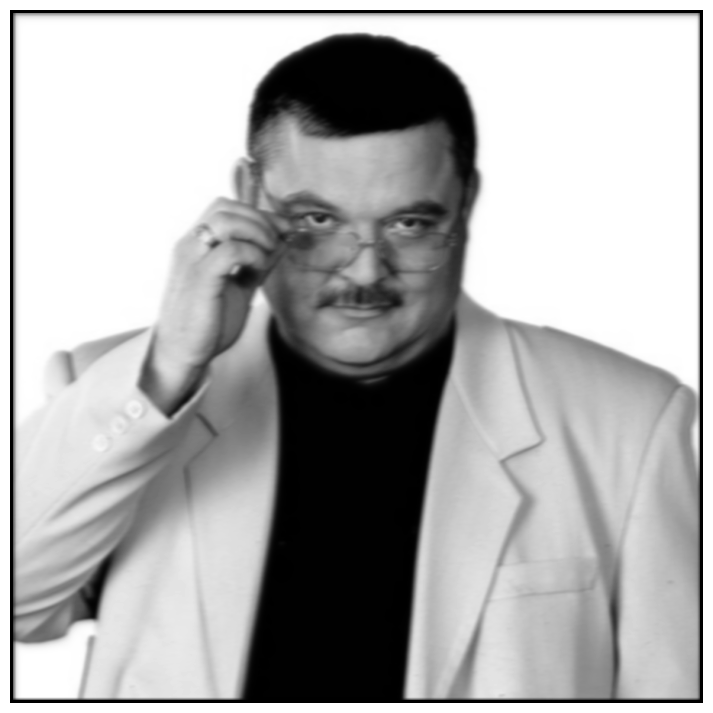

In [8]:
image_blured = blur(image, pad_size=4)
visualize_image(image_blured)